<a href="https://www.kaggle.com/code/anthonyylee/unsupervised-clustering-with-parkinsons-eeg?scriptVersionId=183566598" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Parkinson's Disease Identification with Unsupervised Learning on 64-channel EEG Data

Anthony Lee | June 10th, 2024

## Table of Content

- [Helper Functions](#Helper-Functions)
- [EDA](#EDA)
- [PCA + Kmeans on Full PSD Spectrum](#PCA-and-K-means-of-full-PSD-spectrum)
- [PCA + Kmeans on 7 Physiological Relevant Frequency Bands](#PCA-and-K-means-of-7-bands-of-physiological-relevant-frequency-bands)
- [PCA + Kmeans on Channel Averaged 7 Physiological Relevant Frequency Bands](#PCA-and-K-means-of-7-bands-with-channels-averaged)
- [Figures Collection](#Figures-Collection)

## Abstract

The objective of this notebook is to consider the practicality of utilizing unsupervised learning (UL) to detect Parkinson's Disease (PD) using electroencephalogram (EEG) data. The notebook conducted three forms of feature engineering and analyzed the data in both the usual power-space (voltage-square) and log-scale of the power-space - deciBel (dB, log-scale of the power-space). Of the three forms of feature engineering techniques, it is found that grouping the power spectrum into seven-major frequency bands (Saboo et al., 2019) to have the highest F1-score (0.630). The analysis below could be improved with more specific and specialized signal processing methods to denoise and control for the differences of this heterogenous dataset collected by multiple teams at more than one experimental sites with different instruments. The challenges faced in this notebook is common in most EEG data as they are inherently noisy and can be impacted by various factors such as bad contact between the electrode and the scalp. Further, it would be important to consider Kmeans initialization procedure as the analyses below have fixed random states to provide reproducibility. However, F1-scores do differ once the random states of the algorithms were removed.

## Methods

The dataset was collected across University of New Mexico (UNM; Albuquerque, New Mexico) and University of Iowa (UI; Iowa City, Iowa) using a 64-channel Brain Vision system (Anjum et al., 2021). Even though 149 recordings were gather, only 82 records were used by the original publication for only controls with matching age and sex with PD patients were used for their analysis (Anjum et al., 2021).

Each record in the dataset contains 2-min of EEG recording from a 64-channel Brain Vision system sampling at 500 Hz. Because the two experimental sites used different channel as reference points, only 62 channels were common between the two subsets (Anjum et al., 2021). However, there are only 60 common channels from my analysis.

The raw EEG data (measured in volt) is spectrally analyzed by transforming to the frequency domain as Power Spectral Density (PSD) using the common discrete fast Fourier transformation (DFFT) and Welch's method to find the PSD at approximately a frequency bin-width of 0.224414062. The result is a vector of size 1025 for each of the frequency bin and the spectral power density in volt-squared for each channel of an individual's recording.

The first feature engineering method encodes each subject to a 61,500 dimensional vector by concatenating each of the 60 common channel's 1025 element PSD data in series. 

The second feature engineering method encodes each subject to a 420 dimensional vector by grouping the summing the 1025 frequencies into "seven physiologicall relevant frequency ranges" (Saboo et al., 2019) and then concatenating each of the 60 channels in series to create the 60 * 7 = 420 dinensional encoding vector.

The third feature engineering method encodes each subject to a 7 dimensional vector by grouping the frequency ranges identical to the second analysis, however instead of serially concatenating the 60 channels of each individual, the power of each frequency range is averaged across the individual's 60 channels.

All three sets of feature engineered data are then projected onto a 2-dimensional space using Principal Component Analysis (PCA) and then clustered using K-means into seven and two clusters. The goals of the seven K-means clusters was to observe the clustering pattern alignment with the seven frequency ranges; and the goal of the two K-means clusters was to observe the clustering mechanism in classifying between PD subjects and control subjects.

## Results

When using K-means clustering to cluster into seven groups and plot the labels of each of the 149 data points, there are no visible groups containing all or most of the PD subjects indicating that the K-means clustering is clustering on criteria other than PD vs Control.

When K-means clustering was used to cluster into two groups for the first and second cases of feature analysis, F1 score was used to evaluate the performance of the clustering. Comparing between the 2-group-K-means clustering between the case of entire range of PSD frequencies vs the grouped PSD frequencies, we see an F1 score improvement from 0.336 to 0.630.

## Discussion

The improvement from F1 score of 0.336 to 0.630 by doing some feature engineering is tremendous, however this model still has room for improvement before being used for PD prognosis. Even though the delta, theta, alpha, beta, gamma bands have been commonly used in neuroscience research as biomarkers, there may be other ways of creating biomarkers that could prove to be more effective.

The objective for this analysis is to consider using EEG data as PD diagnosis as early diagnosis could significantly improve the management of PD development. Even though it isn't a curable disease at the moment, democratizing diagnosis can be a huge improvement when most Americans avoid healthcare (Taber et al., 2015) because of the outrageous cost of care.

Even though this dataset includes the label of each subject indicating whether they are PD subjects or control subjects, none of the demographic information nor the disease status were included into the data for training and clustering. Being that age is a strong predictor of PD (Raket et al., 2022), I opted out from including age as part of the training dataset with the objective to search for novel predictors of the disease. 

When working on this analysis, I contemplated on the design and layout of the notebook to strike a balance between a collection of analysis scripts and a proof read research paper. The compromise I found was to focus on a single story line for the analysis and take note of the additional analysis that can be done as future directions. Additionally, I opted to create figures that are self-explanatory and reusable hence spent tremendous effort in annotating and keeping notes so that the analysis can be understood by the reader. The outcome is a large list of suggested future improvement or future directions, and a set of figures that can be downloaded and inserted into documents or presentations.

Future directions: 

- Investigate why there are only 60 common channels as opposed to the 62 channels stated in the paper.
    - During my EDA process I found certain channels to have multiple names thus reducing the size of the set of common channels in the entire dataset. Additionally, the original paper matched PD subjects and control subjects to create balance in the two categories. 
- Futher analyze if the kmeans 7-cluster aligns with the dominant frequency range.
    - Further analyze whether subjects with the same label when Kmeans clusters into 7-groups have the same dominant frequency band. It is observed that PD patients have a strong beta-band power, however, this is not 100% predictive.
- Manually compute and plot the spectrogram instead of relying on v 1.7.*
    - The spectrogram plot computation is very expensive, however, computing the spectrogram could open up the additional ways of analyzing the EEG data by using computer vision techniques such as convolutional neural network. Representing the EEG recording as a spectrogram is also a very dense way of encoding temporal information that is partially lost when doing the power spectral density analysis.
- Do a topomap vs PD visual analysis - Curious if there is a pattern on where high-PSD is for PD patients.
    - In this analysis, I did not look into whether all PD have heightened power in specific regions of the brain (i.e., frontal lope, parietal lobe, temporal lobe, occipital lobe, etc). The map of the 64 channel EEG create a 3D spatial map of a person's cortex and it would be interesting to observe the activity heatmaps between PD vs control subjects.
- Include age in the Kmeans clustering
    - Research has stated that age is a strong predictor (Raket et al., 2022), however, it would be interesting to see if the age dimension is captured as the top principal component during a dimensional reduction by including the age data into the training data set.
- Using unsupervised learning to find more biomarkers
    - Instead of manually feature engineer by the 7 physiological relevant frequency bands (Anjum et al., 2021), do multiple dimensional reduction to extract relevant principal component. Perhaps there are other ways of grouping the frequencies or there are other biomarkers that can provide better clustering results.
- Use other unsupervised learning methods
    - Consider more complex unsupervised learning methods.


## Reference

Anjum, M. F., Dasgupta, S., Mudumbai, R., Singh, A., Cavanagh, J. F., & Narayanan, N. S. (2021). Linear predictive coding distinguishes spectral EEG features of Parkinson’s disease. Parkinsonism & Related Disorders, 79, 79–85. https://doi.org/10.1016/j.parkreldis.2020.08.001

Saboo, K. V., Varatharajah, Y., Berry, B. M., Kremen, V., Sperling, M. R., Davis, K. A., Jobst, B. C., Gross, R. E., Lega, B., Sheth, S. A., Worrell, G. A., Iyer, R. K., & Kucewicz, M. T. (2019). Unsupervised machine-learning classification of electrophysiologically active electrodes during human cognitive task performance. Scientific Reports, 9(1), Article 1. https://doi.org/10.1038/s41598-019-53925-5

Taber, J. M., Leyva, B., & Persoskie, A. (2015). Why do People Avoid Medical Care? A Qualitative Study Using National Data. Journal of General Internal Medicine, 30(3), 290–297. https://doi.org/10.1007/s11606-014-3089-1

Raket, L. L., Oudin Åström, D., Norlin, J. M., Kellerborg, K., Martinez-Martin, P., & Odin, P. (2022). Impact of age at onset on symptom profiles, treatment characteristics and health-related quality of life in Parkinson’s disease. Scientific Reports, 12(1), Article 1. https://doi.org/10.1038/s41598-021-04356-8


## Helper Functions


In [1]:
import os
from pathlib import Path
import scipy
import matplotlib.pyplot as plt
import numpy as np
import mne
from matplotlib import ticker
from tqdm.auto import tqdm
import textwrap
from typing import Union, List
from tqdm.auto import tqdm, trange
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

################################################################################
## Update MNE-Python if version is less than 1.7.*
################################################################################
# if mne.__version__[:3] != "1.7": 
#     !pip install --quiet --force-reinstall -v "mne>=1.7.*"
#     os._exit(00)

################################################################################
## Notebook level variables and settings
################################################################################
notebook_journal = [ ] # This holds the notes for the models
mne.set_log_level("ERROR")
plt.ioff()

################################################################################
## Various helper functions
################################################################################
def gather_all_setFile_paths(): 
    """Convenience function to create a list of paths to the the EEGLab setfiles."""
    # ** indicates cwd and recursive subdirectories - https://docs.python.org/3/library/pathlib.html#pathlib.Path.glob
    return list(Path("/kaggle/input").glob("**/*.set"))


def find_set_of_common_channels(filePaths): 
    """Iterate through all the filepaths to find the set of common channel names."""
    ## Iterates through the files to find the common set of channel names
    for idx, filepath in tqdm(enumerate(filePaths), total=len(filePaths), desc="Finding the set of common channels"):
        raw = mne.io.read_raw_eeglab(filepath)
        ch_names = raw.ch_names

        if idx == 0: 
            ch_names_holder = ch_names
        else: 
            ch_names_holder = list(set(ch_names_holder) & set(ch_names))

    return ch_names_holder


def get_subject_info(subject_id:str) -> pd.DataFrame: 
    """Given the subject ID, return the subject info as a dataframe.
    
    The subject info includes participant_id, GROUP, ID, EEG (EEG file name), AGE, 
    GENDER, MOCA (MOCA score), UPDRS (UPDRS score), and TYPE (numeric value of 
    patient type).
    """
    assert isinstance(subject_id, str), f"The subject_id has to be a string, got {type(subject_id)}"
    
    # Read the subject info
    path_sub_info = Path(
        "/kaggle/input", 
        "rest-eyes-open-parkinsons-disease-64-channel-eeg", 
        "ds004584-download", 
        "participants.tsv")
    df_sub_info = pd.read_csv(path_sub_info, sep='\t')
    df_sub_info = df_sub_info[df_sub_info.participant_id == str(subject_id)]
    
    return df_sub_info


def get_subject_data(subject_id:str) -> pd.DataFrame: 
    """Given the subject ID, return the raw-eeg data as a dataframe.
    
    It may be easier to work with a ndarray. However dataframe provides
    additional information such as column names that makes understanding the 
    data easier.
    """
    
    assert isinstance(subject_id, str), f"The subject_id has to be a string, got {type(subject_id)}"
    
    # Find the EEGLab set file
    path_sub_dir = Path(
        "/kaggle/input", 
        "rest-eyes-open-parkinsons-disease-64-channel-eeg", 
        "ds004584-download",
        str(subject_id)
    )
    path_sub_set_file = list(path_sub_dir.glob("**/*.set"))  # Generator to list
    if len(path_sub_set_file) > 1: 
        raise Exception("More than one set file is found.")
    else: 
        path_sub_set_file = path_sub_set_file[0]
        raw = mne.io.read_raw_eeglab(path_sub_set_file)
        df_raw_eeg = pd.DataFrame(raw.get_data())
        df_raw_eeg["channel_name"] = raw.ch_names
        df_raw_eeg = df_raw_eeg.set_index("channel_name")
        
        return df_raw_eeg
    

def calculate_band_power(
        filepath:Path, 
        channels:Union[str, List[str]], 
        brain_wave_bands:dict=None) -> pd.DataFrame:
    """Calculate the power of each brainwave band and return an ndarray.
    
    The bands were established by (Saboo, 2019) into 7-groups. 
    Becaue the PSD is a distrbituion, to get the power of each band, we add up
    all the PSD values of a specified range to get the power. 
    The power is calculated in V^2 and the unit of the PSD was in V^2 / Hz.
    """

    # Saboo, K. V., Varatharajah, Y., Berry, B. M., Kremen, V., Sperling, M. R., Davis, K. A., Jobst, B. C., 
    # Gross, R. E., Lega, B., Sheth, S. A., Worrell, G. A., Iyer, R. K., & Kucewicz, M. T. (2019). 
    # Unsupervised machine-learning classification of electrophysiologically active electrodes during 
    # human cognitive task performance. Scientific Reports, 9(1), Article 1. 
    # https://doi.org/10.1038/s41598-019-53925-5
    if brain_wave_bands is None: 
        brain_wave_bands = dict(
            low_theta=(2, 5), # Essentially the delta band
            high_theta=(6, 9), 
            alpha=(10, 15), 
            beta=(16, 25), 
            low_gamma=(36, 55), 
            high_gamma_1=(65, 89), 
            high_gamma_2=(90, 115),
        )

    ## Read the file, calculate PSD, extract the PSD (V^2/Hz)
    raw = mne.io.read_raw_eeglab(filepath)
    spectrum = raw.compute_psd(picks=channels, n_jobs=-1)  
    data, freqs = spectrum.get_data(return_freqs=True)
    
    holder_stats = np.ndarray((data.shape[0], len(brain_wave_bands)))
    
    ## Calculate the sum for each brainwave band across all each channels
    ## NOTE: The spectrum is in PSD (voltage^2), thus the band power is the sum of the values in the range
    for idx, (key, val) in enumerate(brain_wave_bands.items()): 
        low_bound, high_bound = val[0], val[1]
        indices = np.argwhere(
            np.logical_and(
                freqs >= low_bound, 
                freqs <= high_bound,
            )
        )
        ## Calculate the band mean across each channel
        holder_stats[:, idx] = np.sum(data[:, indices], axis=1).ravel()
        

    assert holder_stats.shape == (data.shape[0], len(brain_wave_bands)), "Something is wrong."
    
    df_stats = pd.DataFrame(holder_stats)
    df_stats.columns = brain_wave_bands.keys()
    df_stats["channel_name"] = channels
    df_stats = df_stats.set_index("channel_name")
    
    return df_stats

def create_df_subject_info() -> pd.DataFrame: 
    # Read the subject info
    path_sub_info = Path(
        "/kaggle/input", 
        "rest-eyes-open-parkinsons-disease-64-channel-eeg", 
        "ds004584-download", 
        "participants.tsv")
    df_sub_info = pd.read_csv(path_sub_info, sep='\t')
    
    return df_sub_info


def create_df_psd(filePaths:List[Path], channels:List[str]=None) -> pd.DataFrame:
    if channels is None: 
        common_channels = find_set_of_common_channels(filePaths)
    
    holder_df = [ ] 
    
    for filepath in tqdm(filePaths, total=len(filePaths), desc="Creating a dataframe of PSD"): 
        raw = mne.io.read_raw_eeglab(filepath)
        spectrum = raw.compute_psd(picks=common_channels, n_jobs=-1)  
        data, freqs = spectrum.get_data(return_freqs=True)
        participant_id = filepath.stem[:7]
        df_psd = pd.DataFrame(data)
        df_psd["channel_name"] = common_channels
        df_psd["participant_id"] = [participant_id] * data.shape[0]
        df_psd = df_psd.set_index(["participant_id", "channel_name"])
        holder_df.append(df_psd)
        
    df_psd = pd.concat(holder_df)
    return df_psd

def create_df_band_power(filePaths:List[Path], channels:List[str]=None) -> pd.DataFrame: 
    if channels is None: 
        common_channels = find_set_of_common_channels(filePaths)
    
    holder_df = [ ] 
    
    for filepath in tqdm(filePaths, total=len(filePaths), desc="Creating a dataframe of band powers"): 
        df_band_power = calculate_band_power(filepath, common_channels)
        participant_id = filepath.stem[:7]
        df_band_power["participant_id"] = [participant_id] * df_band_power.shape[0]
        df_band_power = df_band_power.reset_index()  # Else the 'channel_name' is not found in df.columns
        df_band_power = df_band_power.set_index(["participant_id", "channel_name"])
        holder_df.append(df_band_power)
        
    df_band_powers = pd.concat(holder_df)
    
    return df_band_powers


## EDA

### Start by getting familiar with the data and the MNE library

This is the first time I've analyzed EEG data. EEG signals are very noisy as it is prone to a lot of external factors. Even within a recording session, each electrode do not necessarily have the same baseline as they don't necessary have the same contact quality. 

The goal of this section is to read an example EEG file and plot what it looks like.

In [2]:
## Getting all the paths to the EEGLab '.set' files
filePaths = gather_all_setFile_paths()

The raw EEG files are read in and plotted. The EEG data is recorded in pico-volt, which is an extremely small value. 

Below we are plotting the 5th recording, and just for the purpose demonstrating some of the MNE functions.

In [3]:
## EDA
ith_path = 5

## Extract and read the EEGLab set/fdt file
filePath = filePaths[ith_path]
rawEegLab = mne.io.read_raw_eeglab(filePath)  # Read the file as a raw file

print(f"Number of channels: {len(rawEegLab.ch_names)}")
print(f"Number of time points: {rawEegLab.n_times}")

Number of channels: 63
Number of time points: 89040


The raw data is plotted here with the y-axis being pico-volt. 
Normally this function would create an interactive widget, however depending on the backend used by Matplotlib, the widget may or may notwork.

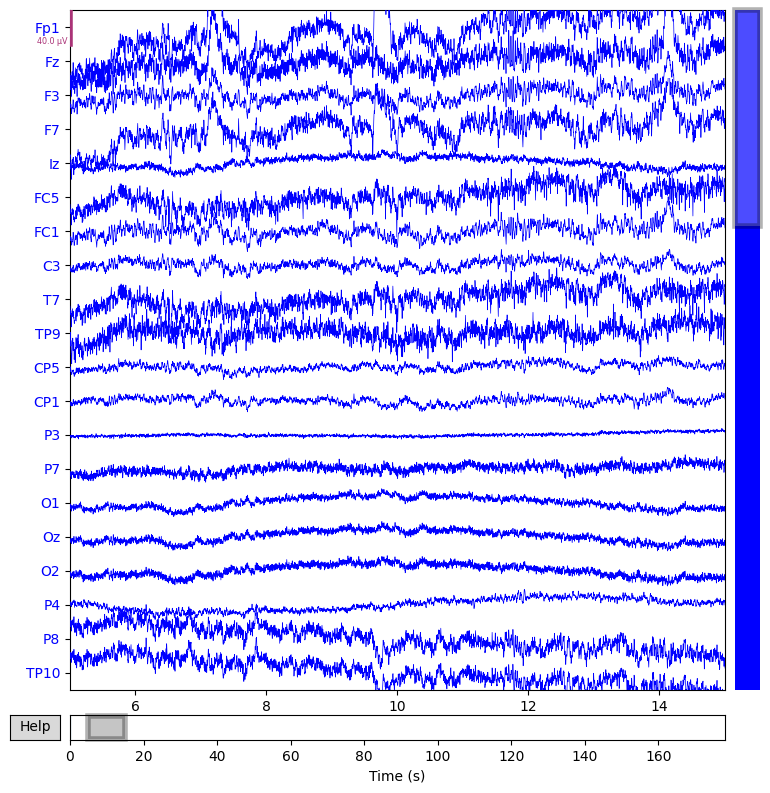

In [4]:
## Plot the raw data
rawEegLab.plot(
    n_channels=20, 
    color="blue",
    start=5,     # Starting at 5sec
    duration=10  # Plot 10sec long --> 5 ~ 5+10 sec
)
plt.show()

This is a topo map of the sensors pertaining to this specific recording. This dataset is a heterogenous dataset thus there are three different kinds of sensor layouts. 

Some of the recording has duplicate sensors as the same xyz location, thus this would be something to look further into. However, the location of the sensor is irrelevant to the analysis here thus the investigation for why there are duplicate sensors at the same location will be skipped over for now.

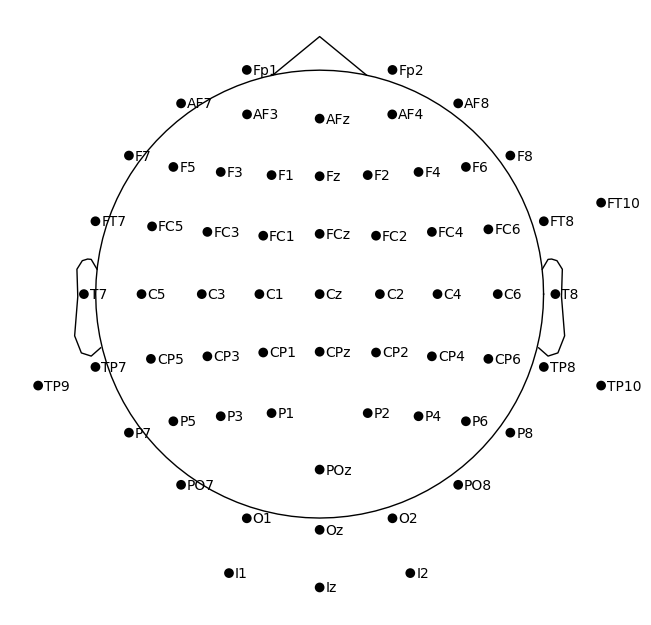

In [5]:
## Plot the sensor names and location
rawEegLab.plot_sensors(show_names=True)
plt.show()

### Power Spectral Density (PSD) for each channel of a recording

PSD is a common transformation done on EEG data to convert the data from a time-domain data to a frequency-domain data. Below, we see peaks at around ~60Hz and ~180Hz. The exact value of the dB does not matter as much as the relative dB across the entire PSD because dB is measured relative to some reference point, and below the reference point was the start of the recording.

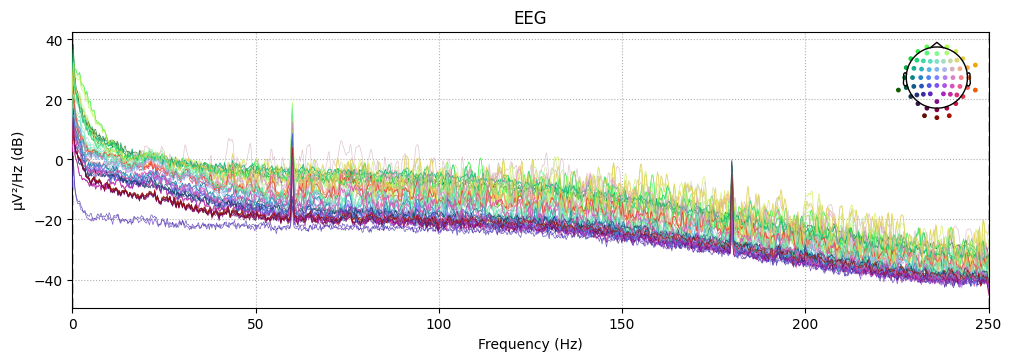

In [6]:
## Plot the Power Spectral Density (PSD) in decibel
rawEegLab.compute_psd().plot(dB=True)
plt.show()

### PSD Topography map
The topography map below plots the PSD across 6-frequency bands. The feature engineering below sub-divided the gamma band into multiple bands thus resulting in 7-frequency bands instead. 

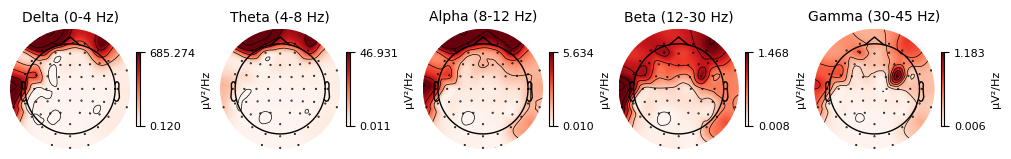

In [7]:
rawEegLab.compute_psd().plot_topomap()
plt.show()

### Plotting the spectrogram

The spectrogram plotting code is commented out because this functionality is only available in the newer version of MNE-Python (version 1.7.*) and this environment has version 1.6 instead. 

Even though it is possible to plot them manually, the computation is expensive and besides the purpose of our analysis.

This is a section that can be improved in the future by manually calculating nad plotting the spectrogram.

In [8]:
# ## EDA - Plotting the spectrogram
# ## NOTE: Cannot plot all channels for all freq range because it will take too many memory.

# rawTfr = rawEegLab.compute_tfr("morlet", list(range(1, 10)), n_jobs=-1, picks="Cz")

# rawTfr.plot()
# # rawTfr.plot_topo()
# # rawTfr.plot_topomap()

# plt.show()

### Understand the distribution of our dataset

Here we see each pair-wise relationship of the dataset. Even though these information were not used in the clustering model, it is still enlightning to understand what kind of data we are working with.


Age is the most prevelant predictor of PD. The subjects from the control set are mostly slightly older than the subjects from the PD set.

The MOCA score evalautes cognitive impairment with a lower score indicating more severe impairment. The PD set has a slightly lower MOCA score peak compared to the controlled set.

THe UPDRS score evaluates the severity of PD thus only PD patients have a score. The greater the UPDRS score the more severe the PD is.

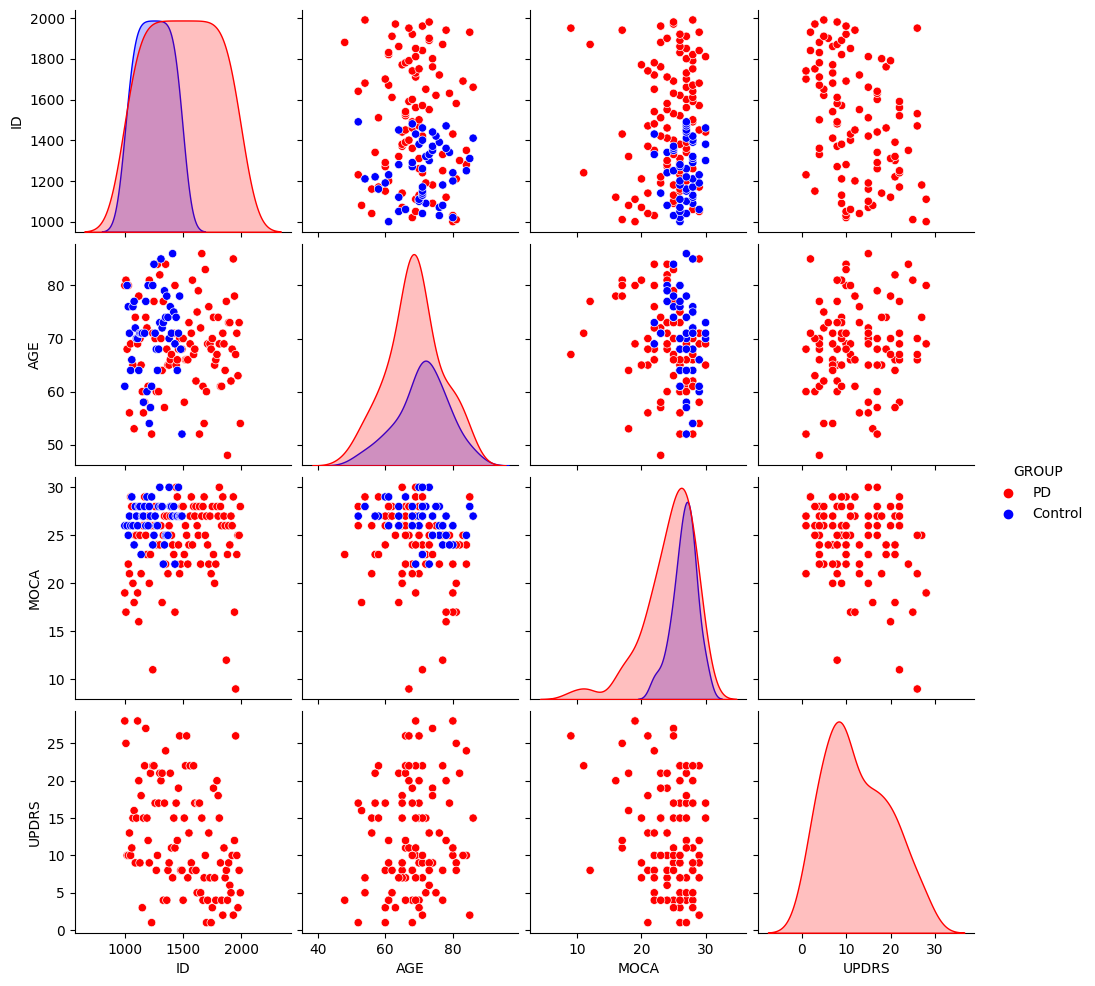

In [9]:
warnings.filterwarnings("ignore")

subject_info = create_df_subject_info()
subject_info.drop("TYPE", axis=1, inplace=True)

sns.pairplot(subject_info, hue="GROUP", palette={"PD":'Red' , "Control": 'Blue'})

plt.show()

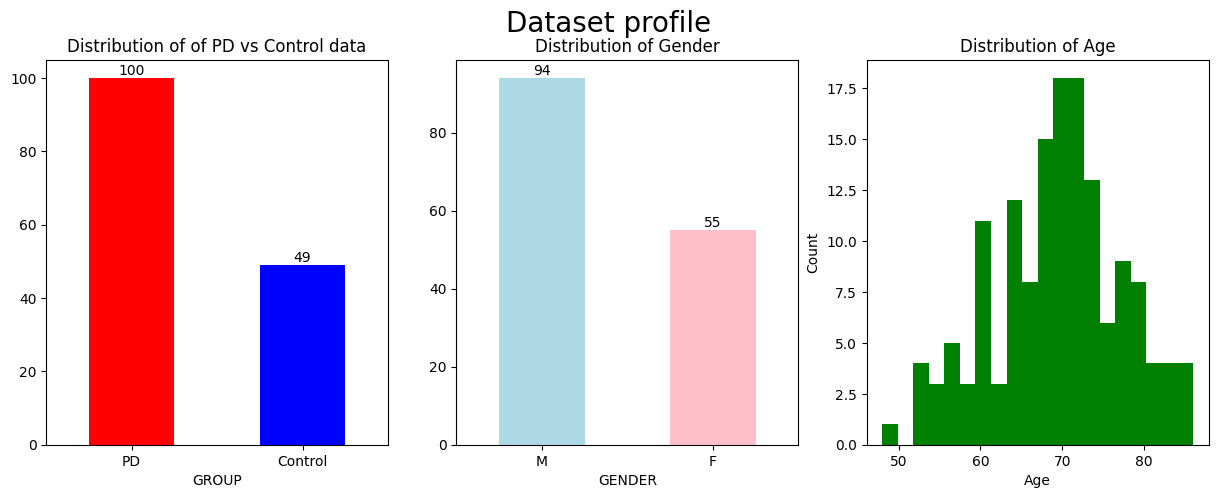

In [10]:
subject_info = create_df_subject_info()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

## Plotting PD vs Control
subject_info.GROUP.value_counts().plot(kind='bar', ax=axs[0])
axs[0].bar_label(axs[0].containers[0])
axs[0].set_title("Distribution of of PD vs Control data")
axs[0].tick_params(labelrotation=0)
## Chaning the facecolor of the rectangles
for idx, rec in enumerate(axs[0].containers[0].patches): 
    colormap = ['red', 'blue']
    rec.set(facecolor=colormap[idx])
    
## Plotting Gender
subject_info.GENDER.value_counts().plot(kind='bar', ax=axs[1])
axs[1].bar_label(axs[1].containers[0])
axs[1].set_title("Distribution of Gender")
axs[1].tick_params(labelrotation=0)
## Chaning the facecolor of the rectangles
for idx, rec in enumerate(axs[1].containers[0].patches): 
    colormap = ['lightblue', 'pink']
    rec.set(facecolor=colormap[idx])

## Plotting Age
subject_info.AGE.plot(kind='hist', ax=axs[2], bins=20, color='green')
axs[2].set_title("Distribution of Age")
axs[2].set_xlabel("Age")
axs[2].set_ylabel("Count")

## Figure
fig.suptitle("Dataset profile", size='20')

plt.show()

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

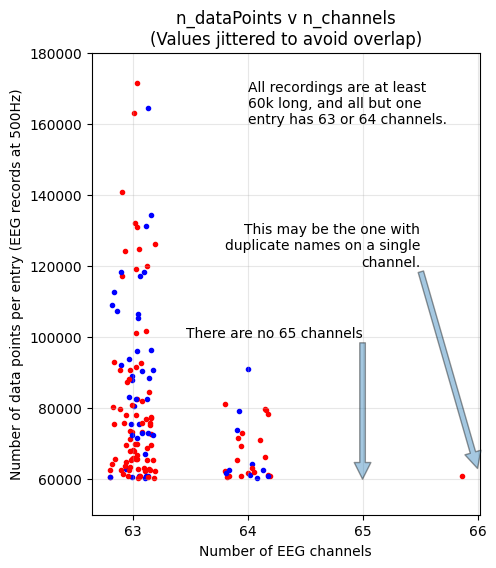

In [11]:
## EDA - Understanding the data - Plotting raw data dimensions
def add_jitter(value, scale=1): 
    return value + np.random.uniform(-1, 1)*scale

## Find the entire space of channel_names
holder_ch_names = []
for idx, filepath in tqdm(enumerate(filePaths), total=len(filePaths)):
    raw = mne.io.read_raw_eeglab(filepath)
    ch_names = raw.ch_names
    holder_ch_names.extend(ch_names)
all_ch_names = list(set(holder_ch_names))

subject_info = create_df_subject_info()

fig, ax = plt.subplots(figsize=(5, 6))
for filePath in tqdm(filePaths): 
    ## Reading the raw EEG
    raw = mne.io.read_raw_eeglab(filePath)
    n_channels = len(raw.ch_names)
    n_times = raw.n_times
    
    ## Determinig if PD or control
    participant_id = filePath.stem[:7]
    mask = subject_info.participant_id == participant_id
    label = subject_info.loc[mask, 'GROUP'].values[0]
    
    ## Plotting the scatter plot
    if label == "PD": 
        ax.scatter(add_jitter(n_channels, 0.2), n_times, marker=".", color="red", label="PD")
    elif label == "Control": 
        ax.scatter(add_jitter(n_channels, 0.2), n_times, marker=".", color="blue", label="Control")
    else: 
        print(f"Something is wrong at {filePath}")

## Add labels to the plot
ax.set_title("n_dataPoints v n_channels\n(Values jittered to avoid overlap)")
ax.set_xlabel("Number of EEG channels")
ax.set_ylabel("Number of data points per entry (EEG records at 500Hz)")
ax.set_ylim(50000, 180000)
ax.xaxis.set_major_locator(ticker.FixedLocator(range(60, 68)))
ax.grid(visible=True, which="both", alpha=0.3)

ax.text(64, 16e4, textwrap.fill("All recordings are at least 60k long, and all but one entry has 63 or 64 channels.", 30))
ax.annotate(
    "There are no 65 channels", 
    xy=(65, 6e4), 
    xytext=(65, 10e4), 
    arrowprops=dict(alpha=0.4), 
    ha="right"
)
ax.annotate(
    textwrap.fill("This may be the one with duplicate names on a single channel.", 30), 
    xy=(66, 6.3e4), 
    xytext=(65.5, 12e4),
    arrowprops=dict(alpha=0.4), 
    ha="right"
)
plt.show()

Reading data:   0%|          | 0/149 [00:00<?, ?it/s]

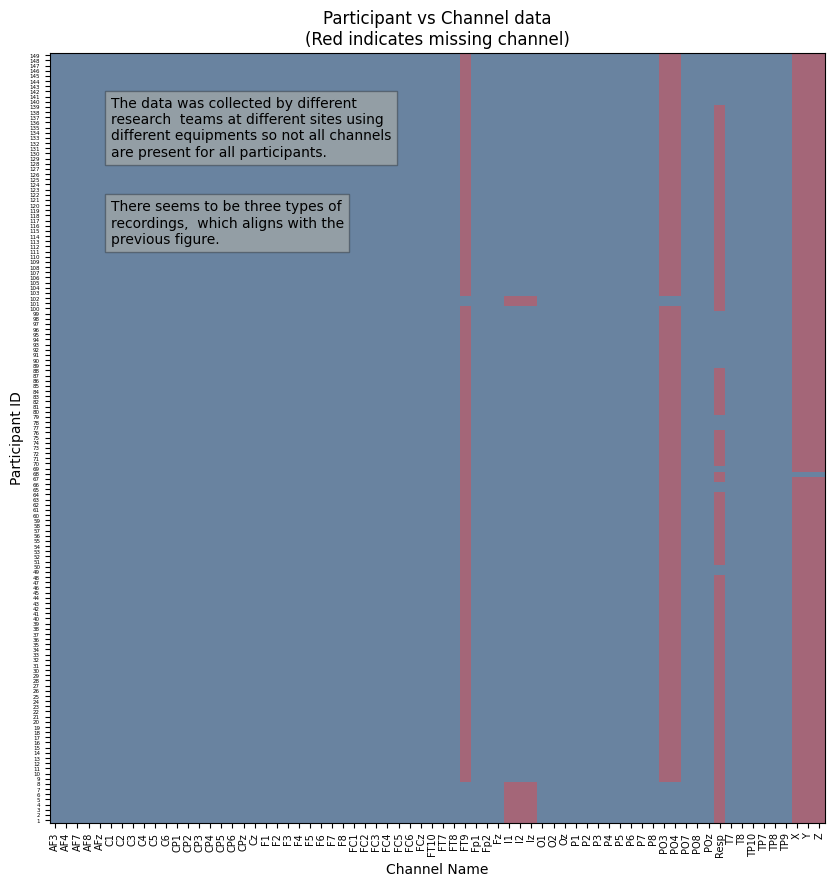

In [12]:
## Create a dataframe indicating whether a channel is presence for a participant
from matplotlib import ticker
holder_for_df = []
holder_participant_id = []

for idx, filepath in tqdm(enumerate(filePaths), total=len(filePaths), desc="Reading data"):
    holder_ch_name_presence = []
    raw = mne.io.read_raw_eeglab(filepath)
    ch_names = raw.ch_names
    participant_id = filepath.stem[:7]
    holder_participant_id.append(participant_id)
    for ch_name in all_ch_names: 
        holder_ch_name_presence.append(ch_name in ch_names)
    holder_for_df.append(holder_ch_name_presence)
        
df_ch_name_presence = pd.DataFrame(holder_for_df)
df_ch_name_presence['participant_id'] = holder_participant_id
df_ch_name_presence = df_ch_name_presence.set_index('participant_id').sort_index()
df_ch_name_presence.columns = all_ch_names
df_ch_name_presence = df_ch_name_presence[sorted(all_ch_names)]

## Plot the figure
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(df_ch_name_presence.to_numpy(), aspect='auto', cmap='RdBu', origin='lower', alpha=0.6)

labels = df_ch_name_presence.columns
positions = range(0, len(labels), 1)
ax.xaxis.set_major_locator(ticker.FixedLocator(positions))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(labels))

ax.yaxis.set_major_locator(ticker.FixedLocator(range(0, df_ch_name_presence.shape[0], 1) ))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(range(1, df_ch_name_presence.shape[0]+1, 1) ))

ax.tick_params(axis='x', rotation=90, labelsize=7)
ax.tick_params(axis='y', labelsize=4)

ax.set_title("Participant vs Channel data\n(Red indicates missing channel)")
ax.set_ylabel("Participant ID")
ax.set_xlabel("Channel Name")


## Add annotation
text_annotation = """The data was collected by different research 
teams at different sites using different equipments so not all channels
are present for all participants."""
ax.annotate( 
    textwrap.fill(text_annotation, 40), 
    (5, 140),
    verticalalignment="top", 
    color='black',
    bbox=dict(facecolor='wheat', alpha=0.3)
)
text_annotation = """There seems to be three types of recordings, 
which aligns with the previous figure."""
ax.annotate(
    textwrap.fill(text_annotation, 40), 
    (5, 120), 
    verticalalignment="top", 
    color='black', 
    bbox=dict(facecolor='wheat', alpha=0.3)
)

plt.show()

## PCA and K-means of full PSD spectrum

Each subject is encoded into an encoding vector by concatenating the full PSD spectrum of all 60x common channels in the same order. The result is a very large dimension encoding vector of 61,500 elements.

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# PCA and Kmeans on the minimally processed EEG data
def plot_2d_kmeans(data_2d, n_clusters=None, ax=None, step_size=None, figsize=None):
    """Func to help plot K-means clustering in 2D
    
    Takes in a 2D data set to plot thus requiring multi-dimensional data to have 
    dimensions reduced to 2-dimensions.
    
    Kmeans has a fixed random state
    
    Parameters
    ----------
      data_2d (ndarray): 2D ndarray to be k-means clustered.
      n_clusters (int): Number lf k-means clusters. 
      ax (matplotlib.axes.Axes): Axes to be plotted on.
      step_size (float): The step size determining the resolution of he meshgrid.
      figsize (Tuple[float]): Tuple of size=2.
    
    Returns
    -------
      ax (matplotlib.axes.Axes): Matplotlib Axes object for the plot.
      kmeans_pred (List[int]): A list of integers indicating the k-means prediction.
    """
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    
    if n_clusters is None: 
        n_clusters = 8
    if figsize is None: 
        figsize = (8, 8)
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    
    kmeans = KMeans(n_clusters = n_clusters, init="k-means++", n_init=30, random_state=5)  # Random State fixed
    kmeans_pred = kmeans.fit_predict(data_2d)
    centroids = kmeans.cluster_centers_

    ## Create a kmeans spatial map
    padding = 2
    x_min, x_max = data_2d[:, 0].min()-padding, data_2d[:, 0].max()+padding
    y_min, y_max = data_2d[:, 1].min()-padding, data_2d[:, 1].max()+padding
    
    ## Calculate the step size - Always using too small of a step could overflow the memory
    if step_size is None: 
        range_to_use = np.min( np.abs(x_max - x_min), np.abs(y_max - y_min) )
        step_size = range_to_use * 1e-2
    
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
    zz = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = zz.reshape(xx.shape)

    ## Plot
    ax.imshow(
        Z, 
        extent = (x_min, x_max, y_min, y_max),
        cmap = plt.cm.Set3,
    )
    ## Plot centroids
    ax.scatter(centroids[:,0], centroids[:,1], marker="X", c="black", alpha=0.7)
    ax.set_title(f"Kmeans clustering with {n_clusters} clusters")
    ax.set_xlabel(f"0th dimension")
    ax.set_ylabel(f"1st dimension")
    
    return ax, kmeans_pred

def f1_and_confusion(y_pred, y_true=None):
    """Calculates the F1 score and plots a confusion matrix.
    
    Parameters
    ----------
      y_pred (List[int]): The predicted labels of each data point.
      y_true (List[int]): The true vabels of each data point.
    
    Returns
    -------
      holder_axes (List[matplotlib.axes.Axes]): List of confusion matrix ax for each mapping.
      holder_f1score (list): List holding the f1 scores of each mapping.
      holder_mapping (list): List holding the mappings.
    
    """
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
    
    holder_axs = [ ] 
    holder_f1score = [ ]
    holder_mapping = [ ] 
    
    mappings = [{"PD": 0, "Control": 1}, {"PD": 1, "Control": 0}]
    
    if y_true is None: 
        y_true = create_df_subject_info().GROUP
    
    for mapping in mappings: 
        y_true_mapped = y_true.map(mapping)
        f1score = f1_score(y_true_mapped, y_pred)
        
        ax = ConfusionMatrixDisplay( confusion_matrix(y_true_mapped, y_pred) ).plot().ax_
        ax.set_title(f"Confusion Matrix\nF1-Score: {round(f1score, 5)}; mapping: {mapping}")
        ax.set_xticks(ticks=list(mapping.values()), labels=list(mapping.keys()))
        ax.set_yticks(ticks=list(mapping.values()), labels=list(mapping.keys()))
        
        holder_axs.append(ax)
        holder_f1score.append(f1score)
        holder_mapping.append(mapping)

        
    return holder_axs, holder_f1score, holder_mapping

In [14]:
## Establish baseline of coin-toss F1 score
## Monte Carlo F1 Score - Simulated coin-toss F1 score

holder_f1_scores = []
trials = 100

for i in trange(trials): 
    y_pred_coin_toss = np.random.choice([1, 0], p=[100/149, 49/149], size=149).tolist()  # 100x with PD and 49x control
    axs, f1scores, maps = f1_and_confusion(y_pred_coin_toss)
    
    holder_f1_scores.append(f1scores)  # Appends both mapping types to the holder
    
plt.close('all')  # Close all figures so it doesn't show up later
    
holder_f1_scores = np.array(holder_f1_scores)

## Finding the better mapping between the two mappings
holder_f1_scores = np.max(holder_f1_scores, axis=1)
## Finding the average F1 score across all these simulation runs
avg_coin_toss_f1 = np.mean(holder_f1_scores)

print(f"The average F1 score of a coin-toss simulation over {trials} trials = {avg_coin_toss_f1}")

  0%|          | 0/100 [00:00<?, ?it/s]

The average F1 score of a coin-toss simulation over 100 trials = 0.6728191877584426


In [15]:
## Create a PSD dataframe that only has the common channels
df = create_df_psd(filePaths)

## Various transformation steps
temp_df = df
## Melt and concat all the freq for each channel
temp_df = temp_df.melt(ignore_index=False).rename({"variable": "freq"}, axis=1)
temp_df = temp_df.reset_index()
temp_df = temp_df.groupby(['participant_id', 'channel_name']).agg(list)
## Melt and concat all the channels for each subject
temp_df = temp_df.reset_index()
temp_df = temp_df.groupby('participant_id').agg(list)
## Flatten the 2D PSD values to 1D for each subject and convert to ndarray (got to vstack else it will be ndarray of ndarrays)
temp_df = np.vstack( temp_df.value.apply(lambda x: np.array(x).ravel()).values )

## Declare the variable for later analysis
patient_datas = temp_df


Finding the set of common channels:   0%|          | 0/149 [00:00<?, ?it/s]

Creating a dataframe of PSD:   0%|          | 0/149 [00:00<?, ?it/s]

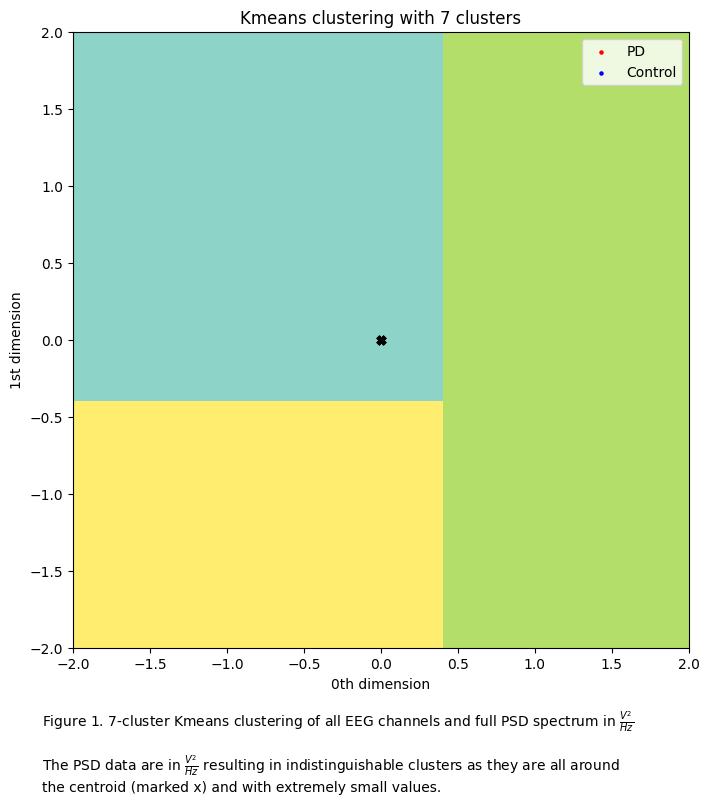

In [16]:
## Original amplitude
data = patient_datas
n_kmeans_clusters = 7
step_size = 1

pca = PCA(n_components = 2, random_state=3)  # Project onto a 2D plane
pca_transformed = pca.fit_transform(data)

## Plot
fig, ax = plt.subplots(figsize=(8, 8))
subject_info = create_df_subject_info()
mask_pd = subject_info[subject_info.GROUP=='PD'].index
mask_control = subject_info[subject_info.GROUP=='Control'].index
ax.scatter(pca_transformed[mask_pd, 0], pca_transformed[mask_pd, 1], c='red', s=5, label="PD")
ax.scatter(pca_transformed[mask_control, 0], pca_transformed[mask_control, 1], c='blue', s=5, label="Control")
ax.legend()

ax, kmeans_pred = plot_2d_kmeans(pca_transformed, 7, figsize=(8, 8), step_size=step_size, ax=ax)

## Adding figure text
text =(
    r"Figure 1. 7-cluster Kmeans clustering of all EEG channels and full PSD spectrum in $\frac{V^2}{Hz}$"
    "\n"
    r"The PSD data are in $\frac{V^2}{Hz}$ resulting in indistinguishable clusters as they are all around the centroid (marked x) and with extremely small values."
)

text = textwrap.fill(text, 100, replace_whitespace=False, drop_whitespace=False)
ax.annotate(text, (-0.05, -0.1), xycoords="axes fraction", va='top', multialignment='left')
plt.show()

## Saving the figure
fig = ax.get_figure()
fig.savefig(Path(os.getcwd(), "figure_1.svg"), bbox_inches='tight')



Changing the PSD power unit to decibel (log-scale) allows for a better clustering.

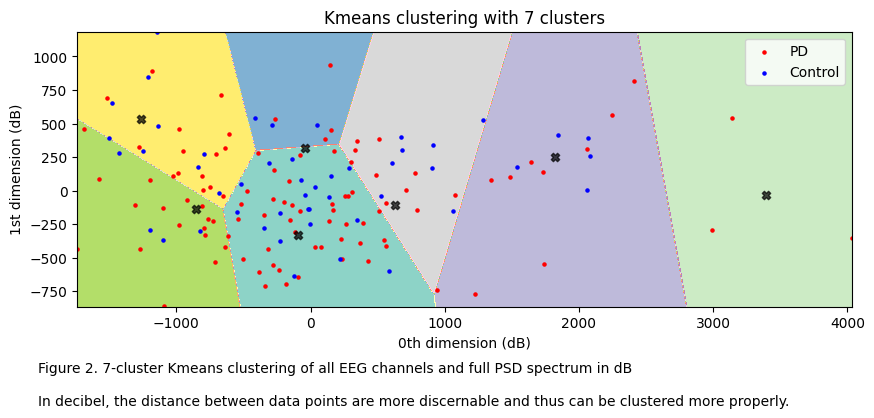

In [17]:
## Converting power to decibels
data = patient_datas
data = 10* np.log10(data)
n_kmeans_clusters = 7
step_size = 1

pca = PCA(n_components = 2, random_state=3)  # Project onto a 2D plane
pca_transformed = pca.fit_transform(data)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
subject_info = create_df_subject_info()
mask_pd = subject_info[subject_info.GROUP=='PD'].index
mask_control = subject_info[subject_info.GROUP=='Control'].index
ax.scatter(pca_transformed[mask_pd, 0], pca_transformed[mask_pd, 1], c='red', s=5, label="PD")
ax.scatter(pca_transformed[mask_control, 0], pca_transformed[mask_control, 1], c='blue', s=5, label="Control")
ax.legend()

ax, kmeans_pred = plot_2d_kmeans(pca_transformed, n_kmeans_clusters, figsize=(8, 8), step_size=step_size, ax=ax)
ax.set_xlabel(ax.xaxis.get_label().get_text() + " (dB)")
ax.set_ylabel(ax.yaxis.get_label().get_text() + " (dB)")

## Annotation
text = (
    "Figure 2. 7-cluster Kmeans clustering of all EEG channels and full PSD spectrum in dB"
    "\n\n"
    "In decibel, the distance between data points are more discernable and thus can be clustered more properly."
)
text = textwrap.fill(text, 200, replace_whitespace=False, drop_whitespace=False)
ax.annotate(text, (-0.05, -0.2), xycoords='axes fraction', va='top', ha='left')

plt.show()

## Saving the figure
fig = ax.get_figure()
fig.savefig(Path(os.getcwd(), "figure_2.svg"), bbox_inches="tight")


Clustering to 2-clusters instead of 7.

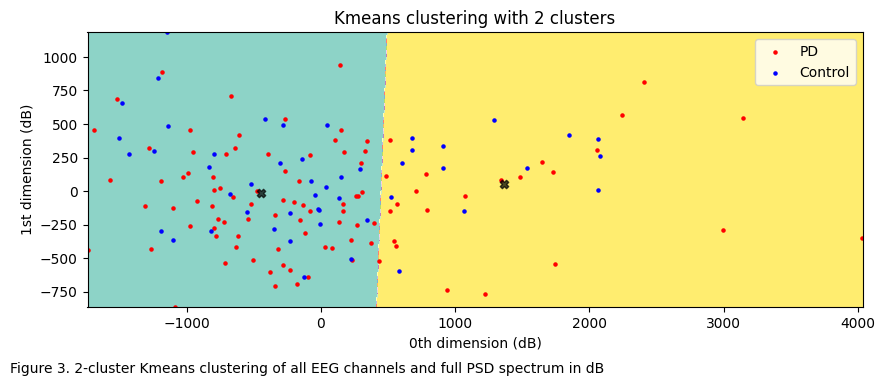

In [18]:
## Converting power to decibels
data = patient_datas
data = 10* np.log10(data)
n_kmeans_clusters = 2
step_size = 1

pca = PCA(n_components = 2, random_state=3)  # Project onto a 2D plane
pca_transformed = pca.fit_transform(data)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
subject_info = create_df_subject_info()
mask_pd = subject_info[subject_info.GROUP=='PD'].index
mask_control = subject_info[subject_info.GROUP=='Control'].index
ax.scatter(pca_transformed[mask_pd, 0], pca_transformed[mask_pd, 1], c='red', s=5, label="PD")
ax.scatter(pca_transformed[mask_control, 0], pca_transformed[mask_control, 1], c='blue', s=5, label="Control")
ax.legend()

ax, kmeans_pred = plot_2d_kmeans(pca_transformed, n_kmeans_clusters, figsize=(8, 8), step_size=step_size, ax=ax)
ax.set_xlabel(ax.xaxis.get_label().get_text() + " (dB)")
ax.set_ylabel(ax.yaxis.get_label().get_text() + " (dB)")

## Annotation
text = "Figure 3. 2-cluster Kmeans clustering of all EEG channels and full PSD spectrum in dB"
text = textwrap.fill(text, 200, replace_whitespace=False, drop_whitespace=False)
ax.annotate(text, (-0.1, -0.2), xycoords='axes fraction', va='top', ha='left')

plt.show()

## Saving the figure
fig = ax.get_figure()
fig.savefig(Path(os.getcwd(), "figure_3.svg"), bbox_inches="tight")


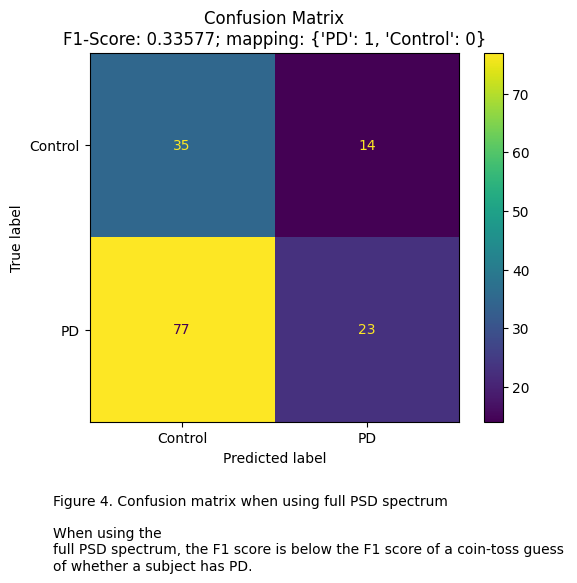

In [19]:
## Plot the confusion matrix
axs, f1scores, mappings = f1_and_confusion(kmeans_pred)

## Which has better f1 score
idx_better = np.argmax(f1scores)
ax = axs[idx_better]
fig = ax.get_figure()
mapping = mappings[idx_better]

## Add annotation
text = (
    "Figure 4. Confusion matrix when using full PSD spectrum"
    "\n\n"
    "When using the full PSD spectrum, the F1 score is below the F1 score of a coin-toss guess of whether a subject has PD."
)
text = textwrap.fill(text, 75, drop_whitespace=False, replace_whitespace=False)
ax.annotate(
    text=text, 
    xy=(-0.1, -0.4), 
    xycoords="axes fraction"
)

## Save the figure
fig.savefig(Path(os.getcwd(), "figure_4.svg"), bbox_inches='tight')

## Close all other figures and only show the selected figure
for idx in range(2):
    if idx != idx_better: 
        plt.close(axs[idx].get_figure())

plt.show()

## PCA and K-means of 7-bands of physiological relevant frequency bands

Instead of using the entire PSD frequency spectrum, the spectrum is grouped into 7-bands and the power of each band is reported. Other literature have used these physiological relevant bands as biomarkers for various neurological disorders. 

Additionally, this reduces the encoding vector from 61,500 elements to 420 elements which saves us from the curse of dimensionality when we only have 149 data points here.

In [20]:
## Creating the dataframe and processing it
##
## This block creates a dataframe from the files and then process them into a shape
## that the sklearn functions would accept. 
## 
## Feature engineering done here groups the frequencies into bands into 7 groups. 
## The 7 groups are physiological relevant groups that has been established in various
## neuroscience research.
## 
## The logic of the feature engineering is encompassed in the definition of the function
## `create_df_band_power()`.

## Create dataframe
df = create_df_band_power(filePaths)  # Feature engineering by grouping spectra into frequency bands

## Some dataframe processing 
temp_df = df
## Turn dataframe from wide to long
temp_df = temp_df.melt(ignore_index=False).rename({'variable': 'freq_band'}, axis=1)
temp_df = temp_df.reset_index()
temp_df = temp_df.groupby(['participant_id', 'channel_name']).agg(list)
temp_df = temp_df.reset_index()
temp_df = temp_df.groupby('participant_id').agg(list)
temp_df = np.vstack( temp_df.value.apply(lambda x: np.array(x).ravel()).values )

## Rename the variable
patient_datas_band_power = temp_df

Finding the set of common channels:   0%|          | 0/149 [00:00<?, ?it/s]

Creating a dataframe of band powers:   0%|          | 0/149 [00:00<?, ?it/s]

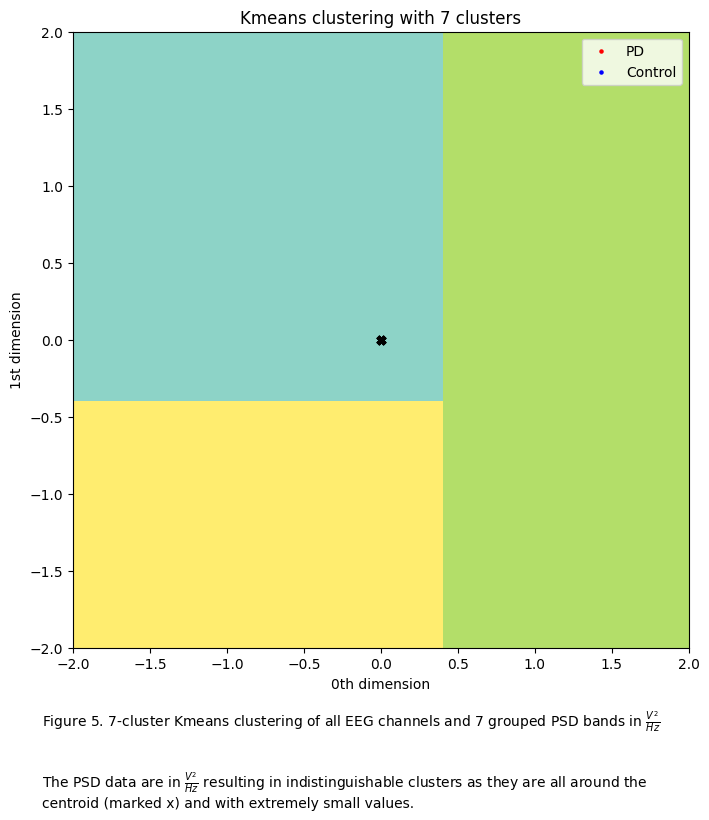

In [21]:
## Original amplitude kmeans clustering - Amplitude unit is in volt-squared
##
## [ ] Check if there is a way to zoom in by adjusting the padding of the plot
## Challenging to reduce the step_size too much as it would exponentially increase
## the size of the meshgrid thus elements to calculate for the k-means plot.

## Some varaibles
data = patient_datas_band_power
n_kmeans_clusters = 7
step_size = 1

## Dimension reduction 
pca = PCA(n_components = 2, random_state=3)  # Project onto a 2D plane
pca_transformed = pca.fit_transform(data)

## Plot each datapoint
fig, ax = plt.subplots(figsize=(8, 8))
subject_info = create_df_subject_info()
mask_pd = subject_info[subject_info.GROUP=='PD'].index
mask_control = subject_info[subject_info.GROUP=='Control'].index
ax.scatter(pca_transformed[mask_pd, 0], pca_transformed[mask_pd, 1], c='red', s=5, label="PD")
ax.scatter(pca_transformed[mask_control, 0], pca_transformed[mask_control, 1], c='blue', s=5, label="Control")
ax.legend()

## Plot the k-means clustering (7 clusters)
ax, kmeans_pred = plot_2d_kmeans(pca_transformed, 7, figsize=(8, 8), step_size=step_size, ax=ax)

## Annotate
text =(
    r"Figure 5. 7-cluster Kmeans clustering of all EEG channels and 7 grouped PSD bands in $\frac{V^2}{Hz}$"
    "\n\n"
    r"The PSD data are in $\frac{V^2}{Hz}$ resulting in indistinguishable clusters as they are all around the centroid (marked x) and with extremely small values."
)

text = textwrap.fill(text, 105, replace_whitespace=False, drop_whitespace=False)
ax.annotate(text, (-0.05, -0.1), xycoords="axes fraction", va='top', multialignment='left')
plt.show()

## Saving the figure
fig = ax.get_figure()
fig.savefig(Path(os.getcwd(), "figure_5.svg"), bbox_inches='tight')


plt.show()

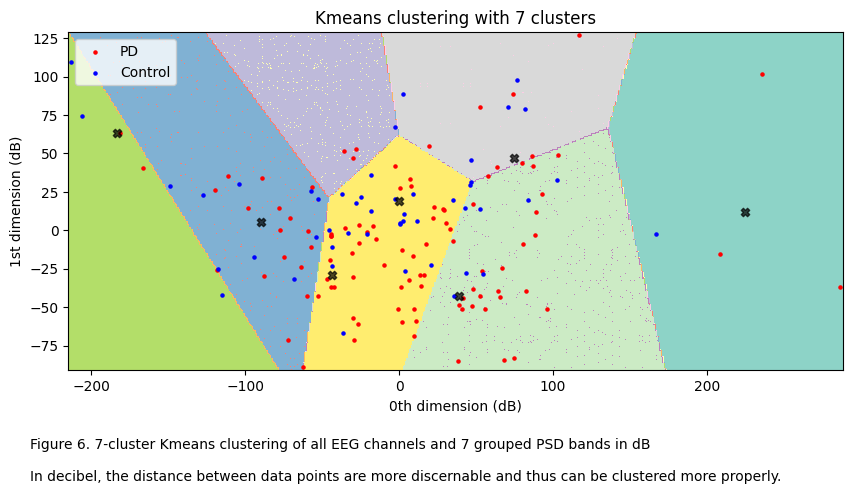

In [22]:
## Converting power to decibels
data = patient_datas_band_power
data = 10* np.log10(data)
n_kmeans_clusters = 7
step_size = 1

pca = PCA(n_components = 2, random_state=3)  # Project onto a 2D plane
pca_transformed = pca.fit_transform(data)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
subject_info = create_df_subject_info()
mask_pd = subject_info[subject_info.GROUP=='PD'].index
mask_control = subject_info[subject_info.GROUP=='Control'].index
ax.scatter(pca_transformed[mask_pd, 0], pca_transformed[mask_pd, 1], c='red', s=5, label="PD")
ax.scatter(pca_transformed[mask_control, 0], pca_transformed[mask_control, 1], c='blue', s=5, label="Control")
ax.legend()

plot_2d_kmeans(pca_transformed, n_kmeans_clusters, figsize=(8, 8), step_size=step_size, ax=ax)
ax.set_xlabel(ax.xaxis.get_label().get_text() + " (dB)")
ax.set_ylabel(ax.yaxis.get_label().get_text() + " (dB)")

## Annotation
text = (
    "Figure 6. 7-cluster Kmeans clustering of all EEG channels and 7 grouped PSD bands in dB"
    "\n\n"
    "In decibel, the distance between data points are more discernable and thus can be clustered more properly."
)
text = textwrap.fill(text, 205, replace_whitespace=False, drop_whitespace=False)
ax.annotate(text, (-0.05, -0.2), xycoords='axes fraction', va='top', ha='left')

plt.show()

## Saving the figure
fig = ax.get_figure()
fig.savefig(Path(os.getcwd(), "figure_6.svg"), bbox_inches="tight")


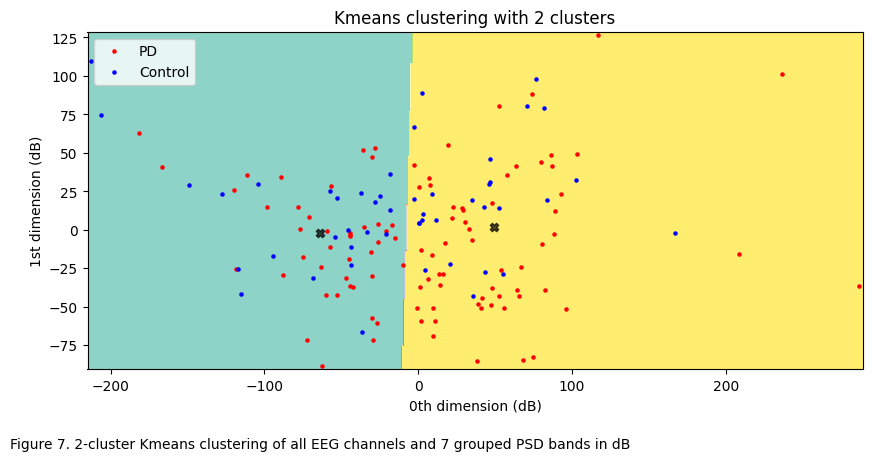

In [23]:
## Converting power to decibels
data = patient_datas_band_power
data = 10* np.log10(data)
n_kmeans_clusters = 2
step_size = 1

pca = PCA(n_components = 2, random_state=3)  # Project onto a 2D plane
pca_transformed = pca.fit_transform(data)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
subject_info = create_df_subject_info()
mask_pd = subject_info[subject_info.GROUP=='PD'].index
mask_control = subject_info[subject_info.GROUP=='Control'].index
ax.scatter(pca_transformed[mask_pd, 0], pca_transformed[mask_pd, 1], c='red', s=5, label="PD")
ax.scatter(pca_transformed[mask_control, 0], pca_transformed[mask_control, 1], c='blue', s=5, label="Control")
ax.legend()

ax, kmeans_pred = plot_2d_kmeans(pca_transformed, n_kmeans_clusters, figsize=(8, 8), step_size=step_size, ax=ax)
ax.set_xlabel(ax.xaxis.get_label().get_text() + " (dB)")
ax.set_ylabel(ax.yaxis.get_label().get_text() + " (dB)")

## Annotation
text = "Figure 7. 2-cluster Kmeans clustering of all EEG channels and 7 grouped PSD bands in dB"
text = textwrap.fill(text, 200, replace_whitespace=False, drop_whitespace=False)
ax.annotate(text, (-0.1, -0.2), xycoords='axes fraction', va='top', ha='left')

plt.show()

## Saving the figure
fig = ax.get_figure()
fig.savefig(Path(os.getcwd(), "figure_7.svg"), bbox_inches="tight")

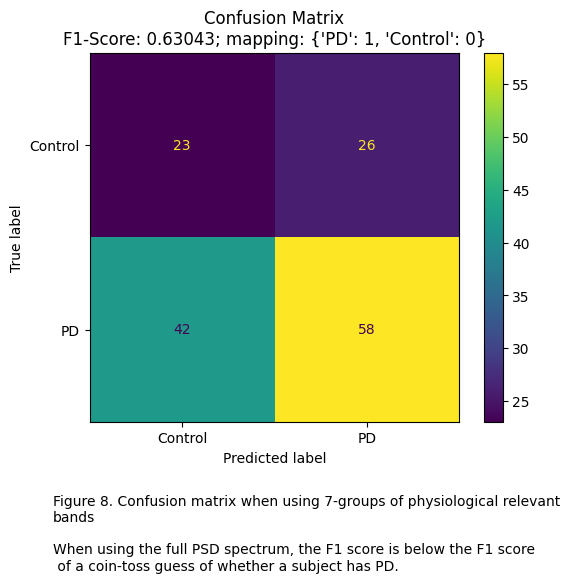

In [24]:
## Plot the confusion matrix
axs, f1scores, mappings = f1_and_confusion(kmeans_pred)

## Which has better f1 score
idx_better = np.argmax(f1scores)
ax = axs[idx_better]
fig = ax.get_figure()
mapping = mappings[idx_better]

## Add annotation
text = (
    "Figure 8. Confusion matrix when using 7-groups of physiological relevant bands"
    "\n\n"
    "When using the full PSD spectrum, the F1 score is below the F1 score of a coin-toss guess of whether a subject has PD."
)
text = textwrap.fill(text, 75, drop_whitespace=False, replace_whitespace=False)
ax.annotate(
    text=text, 
    xy=(-0.1, -0.4), 
    xycoords="axes fraction"
)

## Save the figure
fig.savefig(Path(os.getcwd(), "figure_8.svg"), bbox_inches='tight')

## Close all other figures and only show the selected figure
for idx in range(2):
    if idx != idx_better: 
        plt.close(axs[idx].get_figure())

plt.show()

## PCA and K-means of 7 bands with channels averaged

Here I attempt to reduce the dimension of each encoding vector even further by average 

In [25]:
df = create_df_band_power(filePaths)

temp_df = df
temp_df = temp_df.melt(ignore_index=False).rename({'variable': 'freq_band'}, axis=1)
temp_df = temp_df.pivot_table(values='value', index='participant_id', columns='freq_band', aggfunc='mean')
temp_df = temp_df[['low_theta', 'high_theta', 'alpha', 'beta', 'low_gamma', 'high_gamma_1', 'high_gamma_2']]

patient_datas_avg_channels = temp_df

Finding the set of common channels:   0%|          | 0/149 [00:00<?, ?it/s]

Creating a dataframe of band powers:   0%|          | 0/149 [00:00<?, ?it/s]

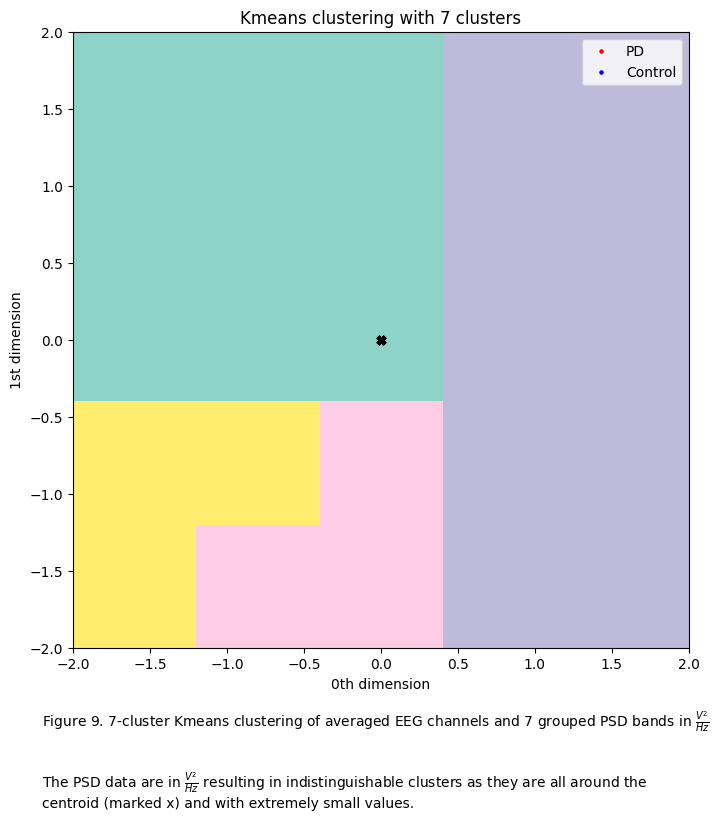

In [26]:
## Original amplitude
data = patient_datas_avg_channels
n_kmeans_clusters = 7
step_size = 1

pca = PCA(n_components = 2, random_state=3)  # Project onto a 2D plane
pca_transformed = pca.fit_transform(data)

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
subject_info = create_df_subject_info()
mask_pd = subject_info[subject_info.GROUP=='PD'].index
mask_control = subject_info[subject_info.GROUP=='Control'].index
ax.scatter(pca_transformed[mask_pd, 0], pca_transformed[mask_pd, 1], c='red', s=5, label="PD")
ax.scatter(pca_transformed[mask_control, 0], pca_transformed[mask_control, 1], c='blue', s=5, label="Control")
ax.legend()

plot_2d_kmeans(pca_transformed, 7, figsize=(8, 8), step_size=step_size, ax=ax)

## Annotate
text =(
    r"Figure 9. 7-cluster Kmeans clustering of averaged EEG channels and 7 grouped PSD bands in $\frac{V^2}{Hz}$"
    "\n\n"
    r"The PSD data are in $\frac{V^2}{Hz}$ resulting in indistinguishable clusters as they are all around the centroid (marked x) and with extremely small values."
)

text = textwrap.fill(text, 110, drop_whitespace=False, replace_whitespace=False)
ax.annotate(text, (-0.05, -0.1), xycoords="axes fraction", va='top', multialignment='left')
plt.show()

## Saving the figure
fig = ax.get_figure()
fig.savefig(Path(os.getcwd(), "figure_9.svg"), bbox_inches='tight')


plt.show()

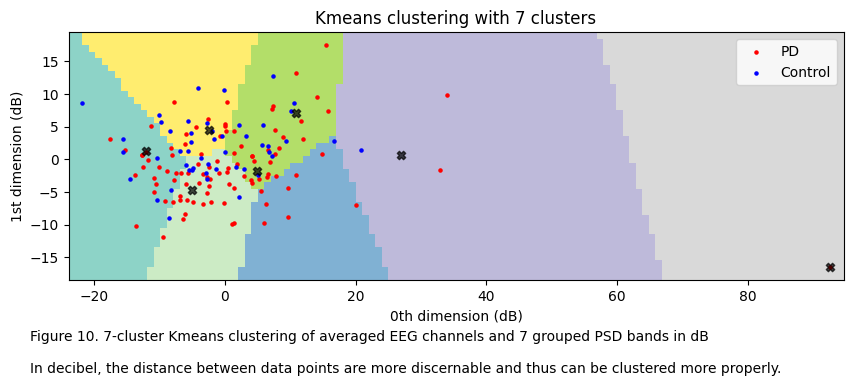

In [27]:
## Converting power to decibels
data = patient_datas_avg_channels
data = 10* np.log10(data)
n_kmeans_clusters = 7
step_size = 1

pca = PCA(n_components = 2, random_state=3)  # Project onto a 2D plane
pca_transformed = pca.fit_transform(data)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
subject_info = create_df_subject_info()
mask_pd = subject_info[subject_info.GROUP=='PD'].index
mask_control = subject_info[subject_info.GROUP=='Control'].index
ax.scatter(pca_transformed[mask_pd, 0], pca_transformed[mask_pd, 1], c='red', s=5, label="PD")
ax.scatter(pca_transformed[mask_control, 0], pca_transformed[mask_control, 1], c='blue', s=5, label="Control")
ax.legend()

plot_2d_kmeans(pca_transformed, n_kmeans_clusters, figsize=(8, 8), step_size=step_size, ax=ax)
ax.set_xlabel(ax.xaxis.get_label().get_text() + " (dB)")
ax.set_ylabel(ax.yaxis.get_label().get_text() + " (dB)")

## Annotation
text = (
    "Figure 10. 7-cluster Kmeans clustering of averaged EEG channels and 7 grouped PSD bands in dB"
    "\n\n"
    "In decibel, the distance between data points are more discernable and thus can be clustered more properly."
)
text = textwrap.fill(text, 205, replace_whitespace=False, drop_whitespace=False)
ax.annotate(text, (-0.05, -0.2), xycoords='axes fraction', va='top', ha='left')

plt.show()

## Saving the figure
fig = ax.get_figure()
fig.savefig(Path(os.getcwd(), "figure_10.svg"), bbox_inches="tight")

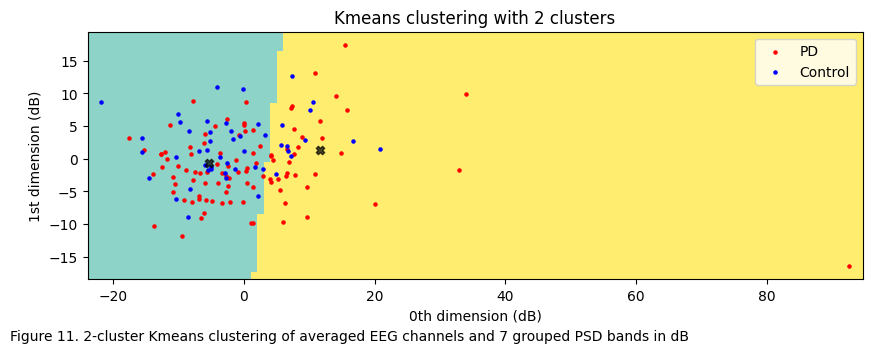

In [28]:
## Converting power to decibels
data = patient_datas_avg_channels
data = 10* np.log10(data)
n_kmeans_clusters = 2
step_size = 1

pca = PCA(n_components = 2, random_state=3)  # Project onto a 2D plane
pca_transformed = pca.fit_transform(data)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
subject_info = create_df_subject_info()
mask_pd = subject_info[subject_info.GROUP=='PD'].index
mask_control = subject_info[subject_info.GROUP=='Control'].index
ax.scatter(pca_transformed[mask_pd, 0], pca_transformed[mask_pd, 1], c='red', s=5, label="PD")
ax.scatter(pca_transformed[mask_control, 0], pca_transformed[mask_control, 1], c='blue', s=5, label="Control")
ax.legend()

ax, kmeans_pred = plot_2d_kmeans(pca_transformed, n_kmeans_clusters, figsize=(8, 8), step_size=step_size, ax=ax)
ax.set_xlabel(ax.xaxis.get_label().get_text() + " (dB)")
ax.set_ylabel(ax.yaxis.get_label().get_text() + " (dB)")

## Annotation
text = "Figure 11. 2-cluster Kmeans clustering of averaged EEG channels and 7 grouped PSD bands in dB"
text = textwrap.fill(text, 200, replace_whitespace=False, drop_whitespace=False)
ax.annotate(text, (-0.1, -0.2), xycoords='axes fraction', va='top', ha='left')

plt.show()

## Saving the figure
fig = ax.get_figure()
fig.savefig(Path(os.getcwd(), "figure_11.svg"), bbox_inches="tight")

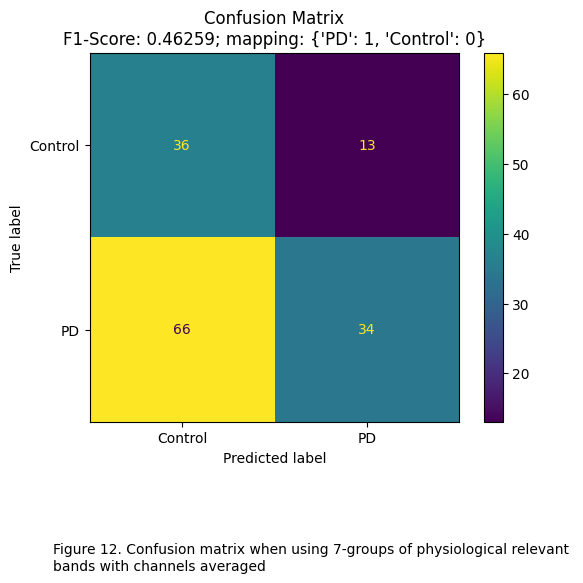

In [29]:
## Plot the confusion matrix
axs, f1scores, mappings = f1_and_confusion(kmeans_pred)

## Which has better f1 score
idx_better = np.argmax(f1scores)
ax = axs[idx_better]
fig = ax.get_figure()
mapping = mappings[idx_better]

## Add annotation
text = (
    "Figure 12. Confusion matrix when using 7-groups of physiological relevant bands with channels averaged"
)
text = textwrap.fill(text, 75, drop_whitespace=False, replace_whitespace=False)
ax.annotate(
    text=text, 
    xy=(-0.1, -0.4), 
    xycoords="axes fraction"
)


## Save the figure
fig.savefig(Path(os.getcwd(), "figure_12.svg"), bbox_inches='tight')

## Close all other figures and only show the selected figure
for idx in range(2):
    if idx != idx_better: 
        plt.close(axs[idx].get_figure())

plt.show()

## Figures Collection
Below are all the figures generated by this notebook in one place.

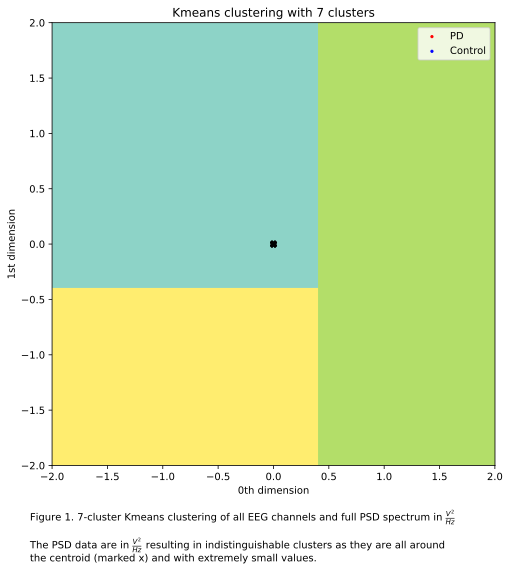

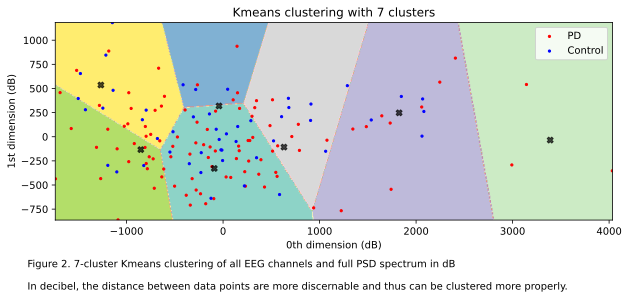

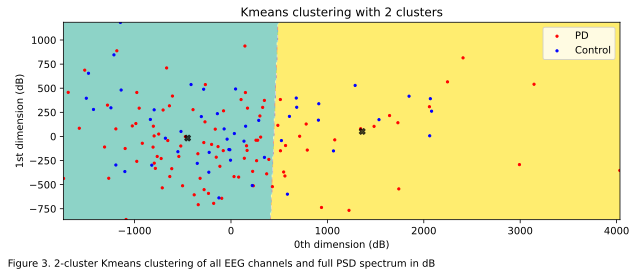

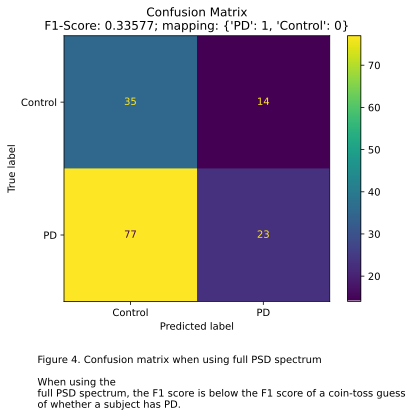

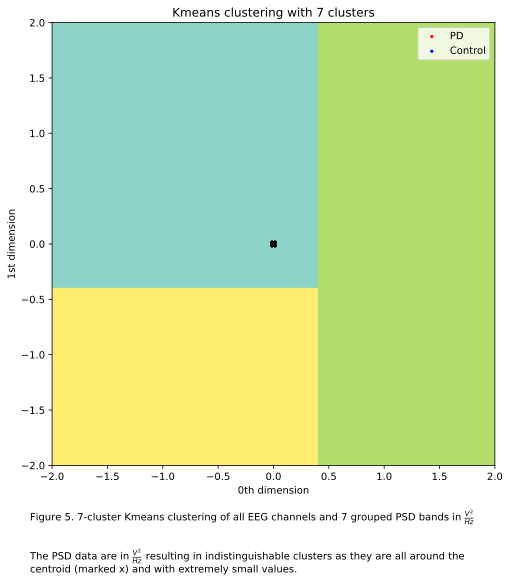

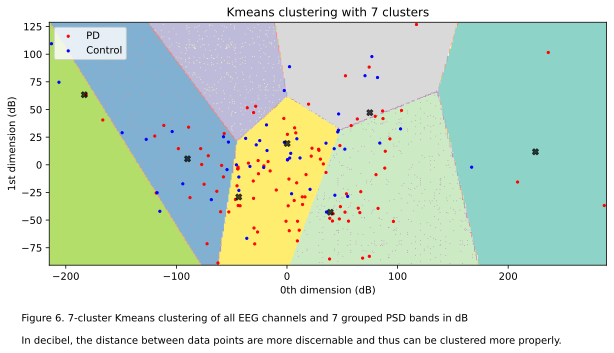

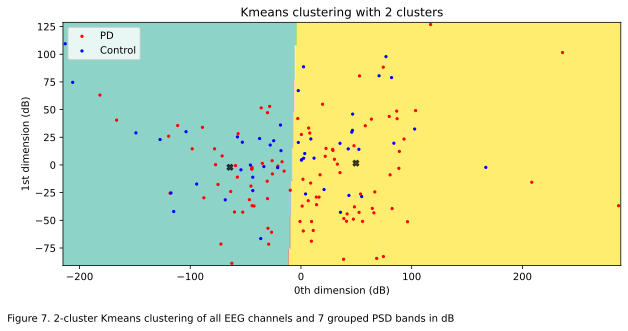

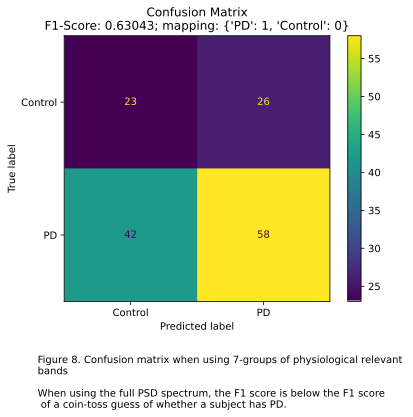

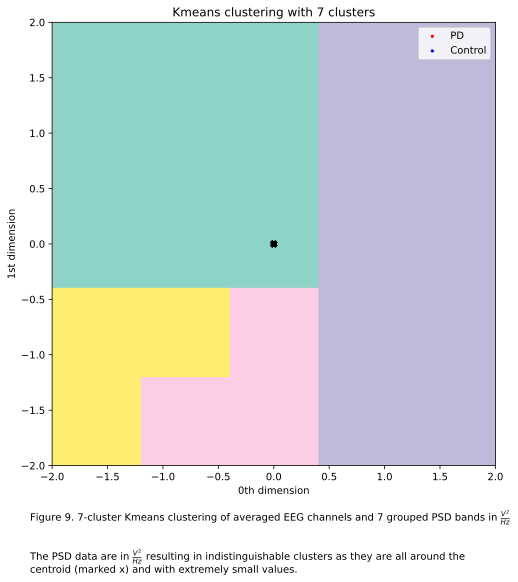

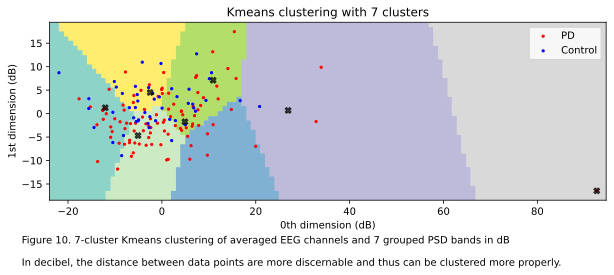

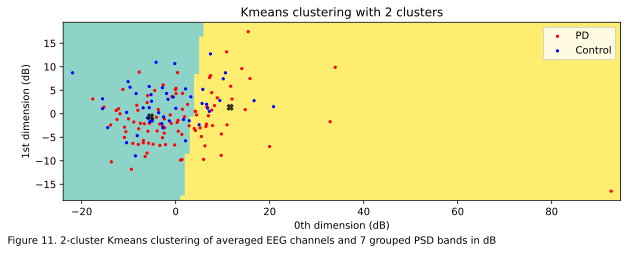

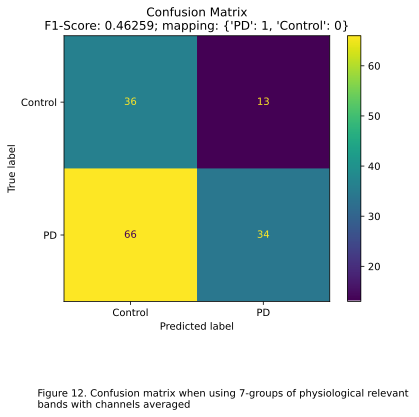

In [30]:
## Printing all generated figures

from IPython.display import SVG

total_fig_count = len( list(Path(os.getcwd()).glob("**/figure_*.svg")) )

for fig_num in range(total_fig_count):
    figPath = Path(os.getcwd(), f"figure_{fig_num+1}.svg")
    svg = SVG(figPath)
    display(svg)

## Extra code - Notes on manually calculating the PSD

compute_psd() method's units: {'eeg': 'V²/Hz'}
Number of lines: 63
max_value = 38.41554363776818


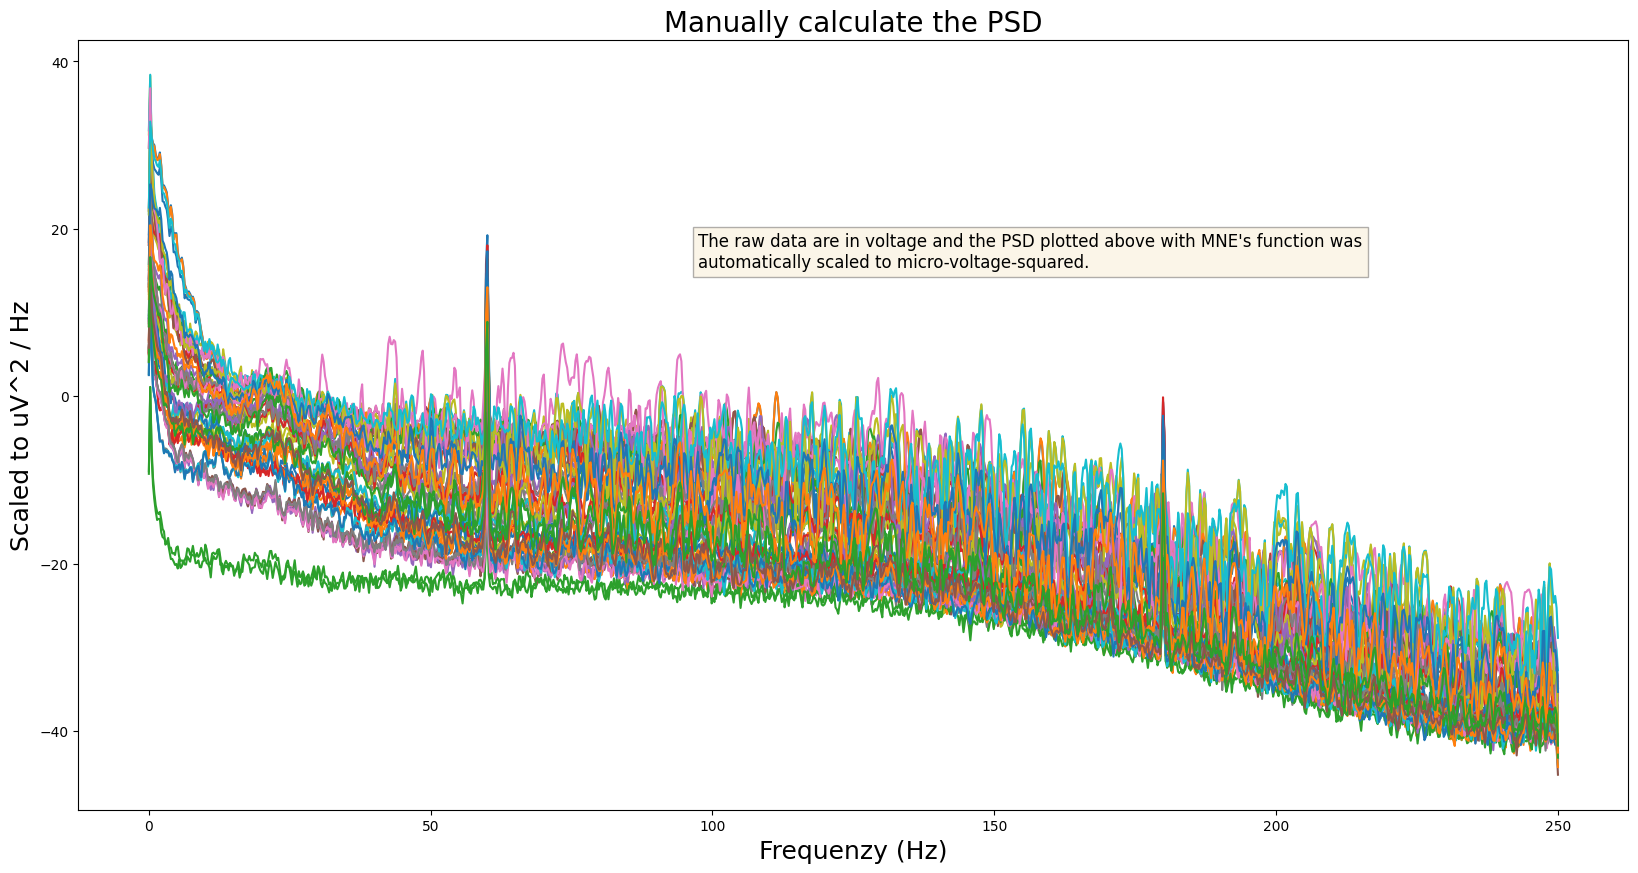

In [31]:
# Manually Calculate and Plot the PSD
# Notes: 
# - `Spectrum.plot()` calls `_plot_psd()` which calls `_plot_lines()` and it has 
#    [this](https://github.com/mne-tools/mne-python/blob/9ba89fd030d1de30d1370631bdd3154223480be5/mne/viz/evoked.py#L656) 
#    scaling logic. This logic scales the EEG data by `10**6 * 10**6`. 
#    And now my graph vs the MNE PSD graph matches.
# - The reason that my plot differed from the plotting method in the MNE library
#   is because I didn't scale my values as how they were scaled in the plotting method.
#   One can see the differences between the units provided by the `compute_psd()` method
#   vs the unit that is plotted in the plot.



## Calculate the PSD (scipy.signal.spectrogram()) and plot it
# rawEegLab = mne.io.read_raw_eeglab(filePaths[5])
psd = rawEegLab.compute_psd()  # This method uses the old scipy spectrogram function
print(f"compute_psd() method's units: {psd.units()}")  # Isn't micro-V^2 / Hz as shown in the plot
data = psd.get_data()  # The psd value calculated 
freqs = psd.freqs      # The x-axis of the freq domain PSD data

## Plotting the PSD data
fig, ax = plt.subplots(figsize=(20, 10))
for i in range(data.shape[0]): 
    channel_data = data[i]
    channel_data *= 1e6 ** 2  # The scaling logic in the source code
    ax.plot(freqs, 10*np.log10(channel_data))  ## dB from voltage requires 20*

## Finding the max value from the plot
ax = fig.get_axes()[0]
print(f"Number of lines: {len(ax.lines)}")
max_value = -np.inf
for i in range(len(ax.lines)): 
    ydata = ax.lines[i].get_ydata()
    max_ydata = np.max(ydata)
    if max_ydata > max_value: 
        max_value = max_ydata
print(f"max_value = {max_value}")

## Annnotate
ax.set_title("Manually calculate the PSD", size=20)
ax.set_ylabel("Scaled to uV^2 / Hz", size=18)
ax.set_xlabel("Frequenzy (Hz)", size=18)

text = "The raw data are in voltage and the PSD plotted above with MNE's function was automatically scaled to micro-voltage-squared."
ax.annotate(
    textwrap.fill(text, 80), 
    xy=(0.4, 0.75), 
    xycoords="axes fraction", 
    va='top', 
    fontsize=12,
    bbox=dict(facecolor='wheat', alpha=0.3)
)

plt.show()

## Extra code - Plotting the sensor topomap

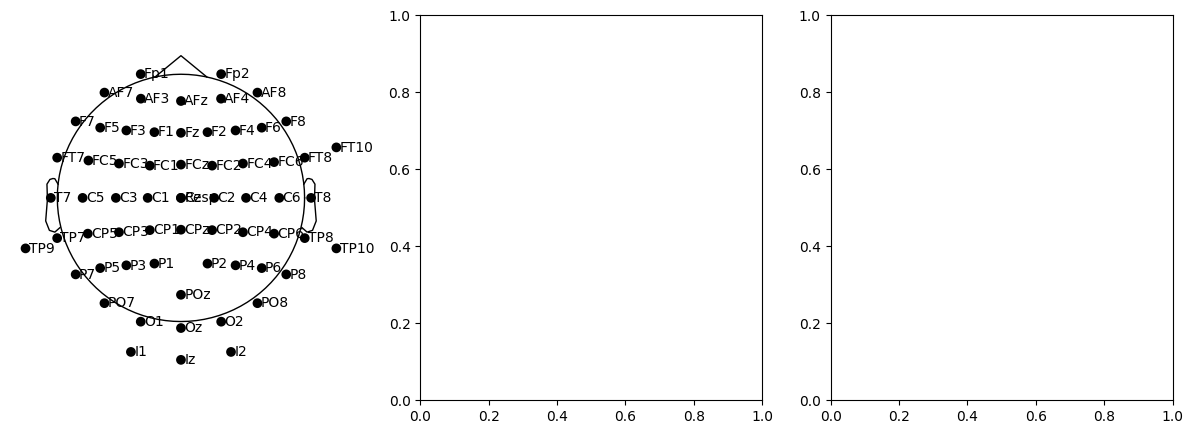

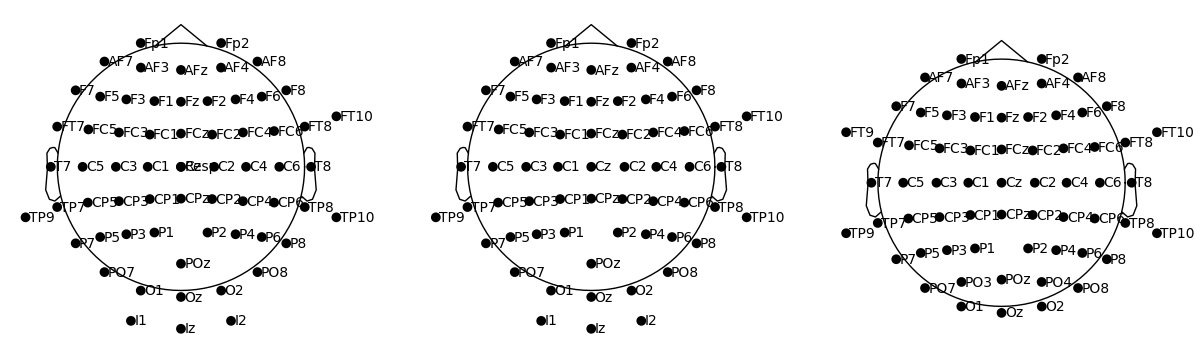

In [32]:
################################################################################
## IGNORE: 
## Not sure why this doensn't work as this may be a bug in the implementation of
## MNE in how it utilizes the Axes passed via the method parameter. 
## I have tested both plt ion and ioff but issue persists. 
################################################################################

## EDA - Showing the different layouts

raw = mne.io.read_raw_eeglab(filePaths[0])
raw1 = mne.io.read_raw_eeglab(filePaths[1])
raw2 = mne.io.read_raw_eeglab(filePaths[6])

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(3*5, 5))
raw.plot_sensors(show_names=True, axes=ax0)
raw1.plot_sensors(show_names=True, axes=ax1)
raw2.plot_sensors(show_names=True, axes=ax2)

# plt.show()  # This causes the plot to show up weird